In [234]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
import warnings
warnings.filterwarnings('ignore')
#Importing Regressor models and metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import accuracy_score,mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, KFold



In [235]:
df = pd.read_csv(r"C:\Users\User\Desktop\Assignment4\calories_burn.csv")
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190,94,29,105,40.8,231
1,14861698,female,20,166,60,14,94,40.3,66
2,11179863,male,69,179,79,5,88,38.7,26
3,16180408,female,34,179,71,13,100,40.5,71
4,17771927,female,27,154,58,10,81,39.8,35


In [236]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  int64  
 4   Weight      15000 non-null  int64  
 5   Duration    15000 non-null  int64  
 6   Heart_Rate  15000 non-null  int64  
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 1.0+ MB


(15000, 9)

In [237]:
df.iloc[:, 1:].describe()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


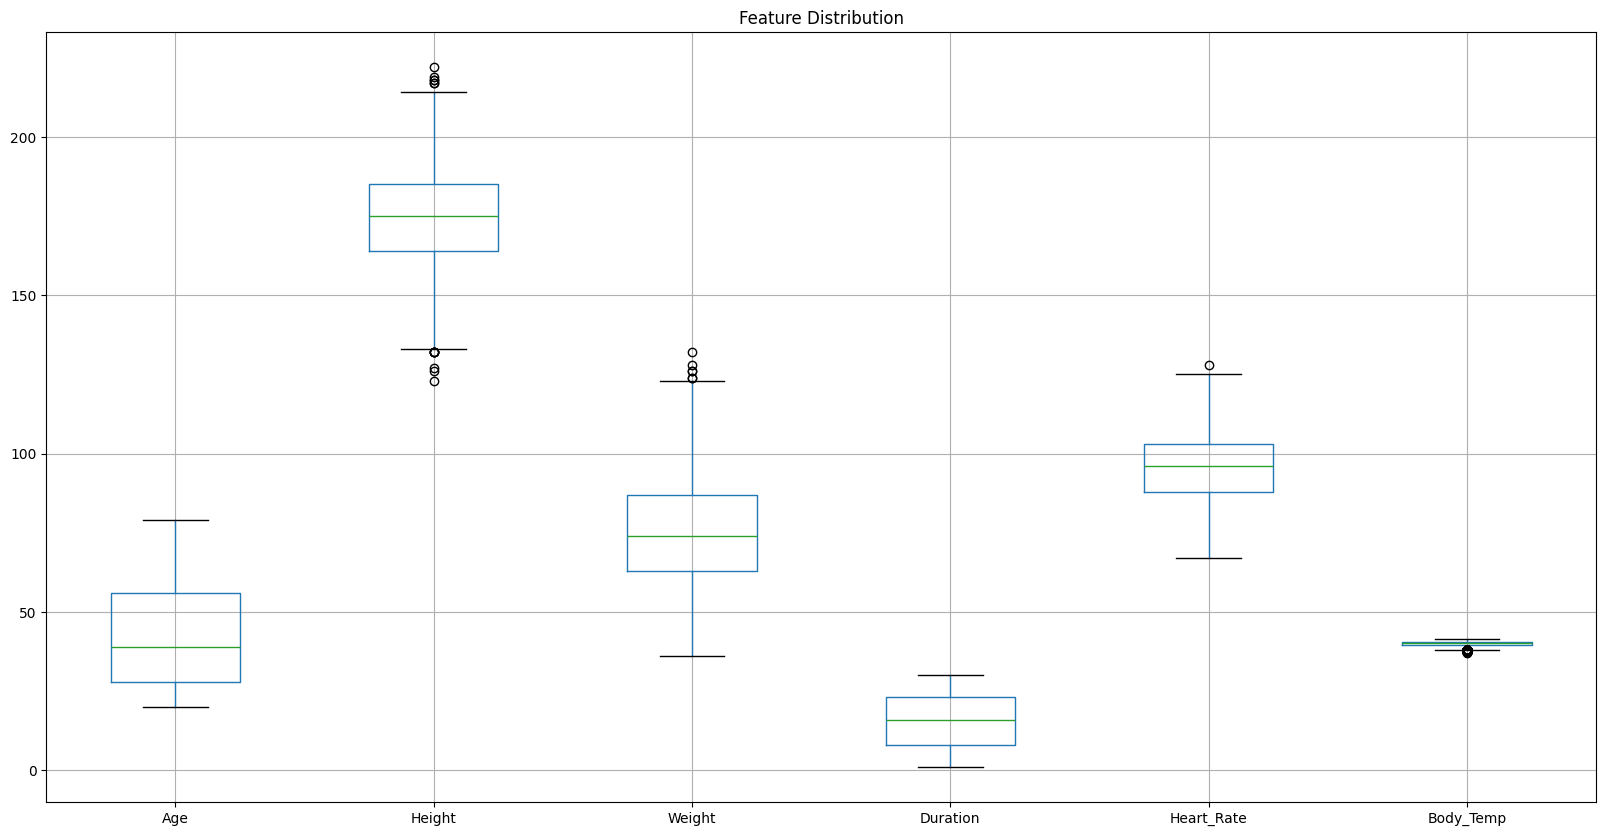

In [238]:
bxplt = df.loc[:,['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp']] 
bxplt.boxplot(figsize = (20, 10))
plt.title("Feature Distribution")
plt.show()

In [239]:
df.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [240]:
df['Gender'].value_counts()

Gender
female    7553
male      7447
Name: count, dtype: int64

In [241]:
#converting gender column to categorical then encoding cateogries to 0s and 1s
df['Gender'] = df['Gender'].astype('category').map({"male": 1 , 'female': 0})
df['Gender'].value_counts()


Gender
0    7553
1    7447
Name: count, dtype: int64

In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   User_ID     15000 non-null  int64   
 1   Gender      15000 non-null  category
 2   Age         15000 non-null  int64   
 3   Height      15000 non-null  int64   
 4   Weight      15000 non-null  int64   
 5   Duration    15000 non-null  int64   
 6   Heart_Rate  15000 non-null  int64   
 7   Body_Temp   15000 non-null  float64 
 8   Calories    15000 non-null  int64   
dtypes: category(1), float64(1), int64(7)
memory usage: 952.4 KB


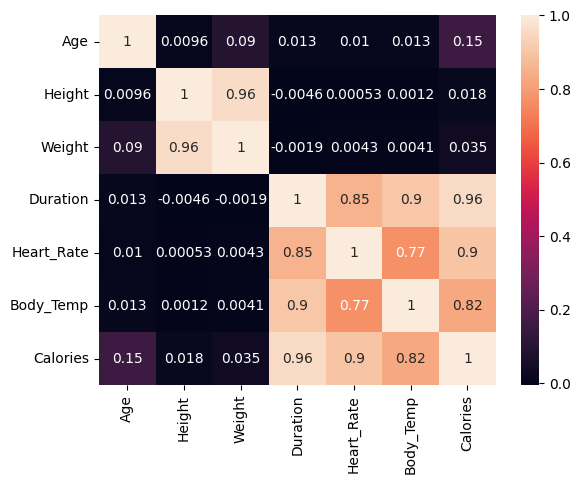

In [243]:
hm = df[['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Calories']]
sns.heatmap(hm.corr(),annot = True )
plt.show()

#### Observations 

* Body Temperature , Heart Rate and Duration of workout had a very high correlation coefficient with calories burned.


## Seperating Features and Target Variable

In [244]:
X = df.drop(['User_ID','Calories'], axis = 1)
y = df['Calories']


In [245]:
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

scaler = StandardScaler().fit(X_train)
X_train_sc = scaler.transform(X_train)
std = pd.DataFrame(scaler.transform(X_train), columns=X.columns)
X_train_sc= std
X_train_sc.head()



,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,1.011398,1.142470,-0.170415,0.405758,-0.182779,-0.784549,0.610477
1,1.011398,2.028381,0.532036,0.538986,1.500617,1.308721,0.995151
2,-0.988730,1.792138,-0.310905,-0.260384,0.057706,-0.470558,0.225803
3,1.011398,1.969320,0.110566,0.405758,1.019647,-0.156568,0.866926
4,1.011398,-0.038744,0.602281,0.139301,-1.024476,-0.261231,-0.287095


In [246]:
Model = []
RMSE = []
R_sq = []
cv = KFold(5)


def input_scores(name, model, x, y):
    Model.append(name)
    RMSE.append(np.sqrt((-cross_val_score(model, x, y, scoring = 'neg_mean_squared_error', cv = cv).mean())))
    R_sq.append(cross_val_score(model, x, y, scoring = 'r2', cv = cv).mean())


In [247]:
names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression',
         'K Neighbors Regressor', 'Decision Tree Regressor', 
         'Random Forest Regressor', 'Gradient Boosting Regressor',
         'Adaboost Regressor']


models = [LinearRegression(), Ridge(), Lasso(),
          KNeighborsRegressor(), DecisionTreeRegressor(),
          RandomForestRegressor(), GradientBoostingRegressor(), 
          AdaBoostRegressor()]

for name, model in zip(names, models):
    input_scores(name, model, X_train_sc, y_train)

evaluation = pd.DataFrame({'Model': Model, 'RMSE': RMSE, 'R Squared': R_sq})

print("Training scores below.Best model will be selected for hyperparameter tuning.")
evaluation

Training scores below.Best model will be selected for hyperparameter tuning.


,Model,RMSE,R Squared
0,Linear Regression,11.210435,0.967534
1,Ridge Regression,11.210429,0.967534
2,Lasso Regression,12.195827,0.961577
3,K Neighbors Regressor,5.381816,0.992507
4,Decision Tree Regressor,5.514262,0.991867
5,Random Forest Regressor,3.084431,0.997518
6,Gradient Boosting Regressor,3.703631,0.996458
7,Adaboost Regressor,11.832682,0.964532


In [248]:
best_model = evaluation.sort_values(by = ['RMSE', 'R Squared'], ascending = [True, False]).reset_index(drop = True).iloc[0]
best_model

Model        Random Forest Regressor
RMSE                        3.084431
R Squared                   0.997518
Name: 0, dtype: object

In [249]:
RandomForestRegressor()

RandomForestRegressor()

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [400, 500],
    'max_depth': [30, 40],
    'min_samples_split': [2, 5 ],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state = 1), param_grid, cv = cv, scoring = 'neg_mean_squared_error' , n_jobs= -1)
grid_search.fit(X_train_sc, y_train)

print('Best Parameters:', grid_search.best_params_)
print('-'*27)
print('Lowest RMSE:', np.sqrt(-grid_search.best_score_))

Best Parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
---------------------------
Lowest RMSE: 3.064220351465171


In [253]:
import pickle
filename = 'calories_burn_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(grid_search,file)
print(f"Model saved as {filename}")

Model saved as calories_burn_model.pkl
